## Heart Failure Prediction Using ANN

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)
# pd.pandas.set_option('display.max_rows',None)

In [109]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [110]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [112]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [113]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [114]:
df.shape

(299, 13)

In [115]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [116]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## EDA
Target Feature

In [117]:
df['DEATH_EVENT'].value_counts()/len(df)*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

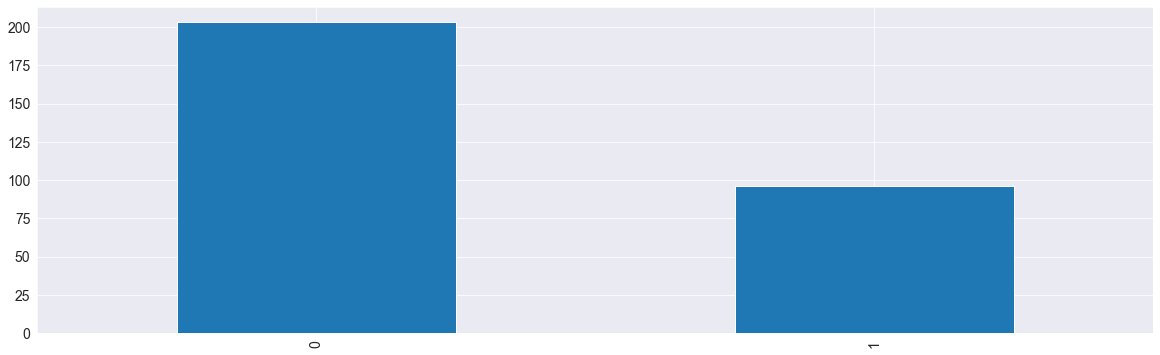

In [118]:
df.DEATH_EVENT.value_counts().plot.bar()

Data is imbalanced. We will balance the data in Future

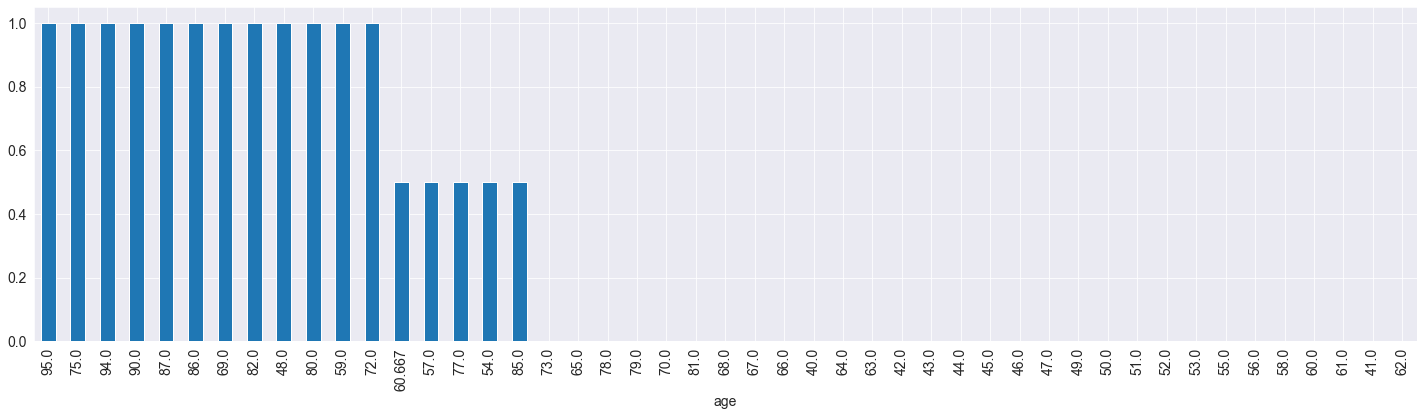

In [119]:
df.groupby(['age'])['DEATH_EVENT'].median().sort_values(ascending=False).plot.bar()
plt.tight_layout()

<AxesSubplot:>

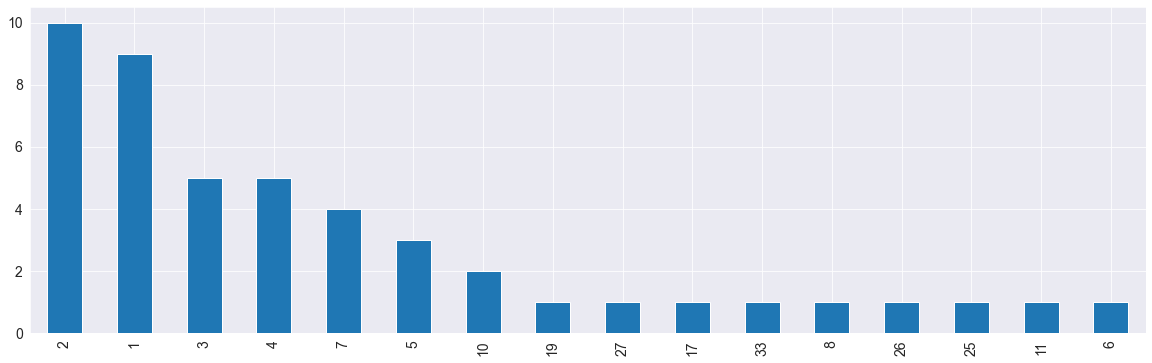

In [120]:
df['DEATH_EVENT'].groupby(df['age']).size().value_counts().plot.bar()

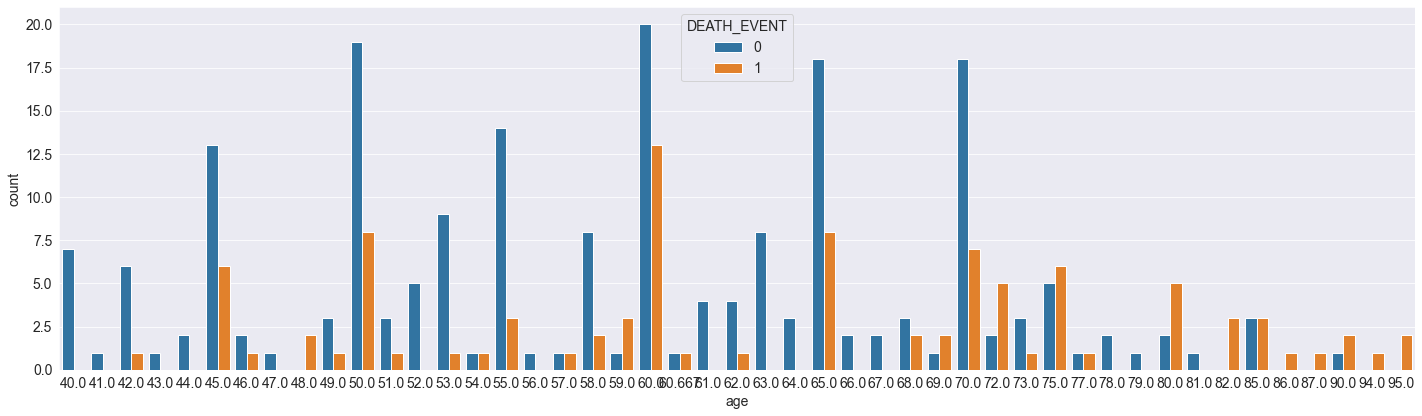

In [121]:
sns.countplot(x='age', data = df, hue='DEATH_EVENT')
plt.tight_layout()

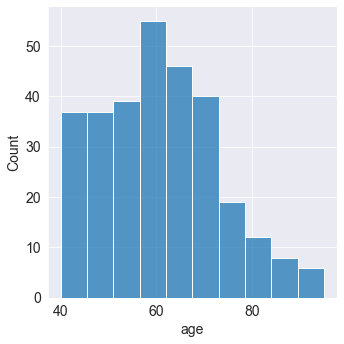

In [122]:
sns.displot(x= 'age', data = df)

In [123]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [124]:
df.serum_sodium.unique()

array([130, 136, 129, 137, 116, 132, 131, 138, 133, 140, 127, 121, 135,
       134, 144, 128, 145, 142, 139, 146, 141, 143, 126, 124, 113, 125,
       148], dtype=int64)

## Numerical Features
Continuous Features

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [126]:
discrete_features = [feature for feature in df.columns if df[feature].dtype == 'int64' and len(df[feature].unique())<100]

In [127]:
continuous_features = [feature for feature in df.columns if df[feature].dtype == 'float64' or feature not in discrete_features]

In [128]:
continuous_features

['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'time']

In [129]:
for i in continuous_features:
    print(i ,' Has Unique values = ', len(df[i].unique()))

age  Has Unique values =  47
creatinine_phosphokinase  Has Unique values =  208
platelets  Has Unique values =  176
serum_creatinine  Has Unique values =  40
time  Has Unique values =  148


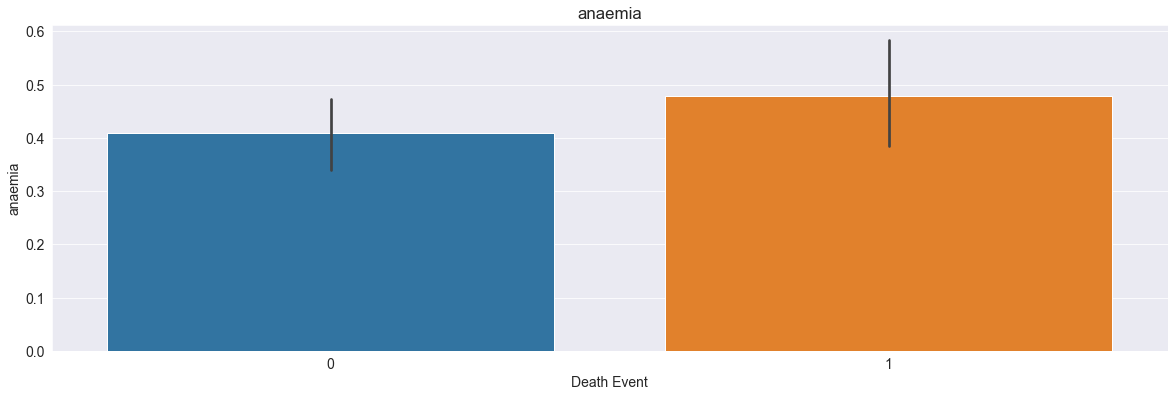

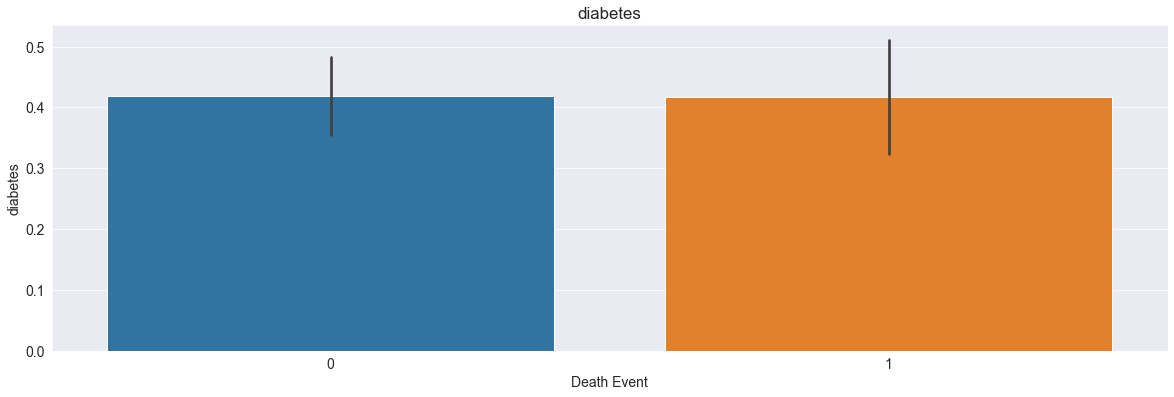

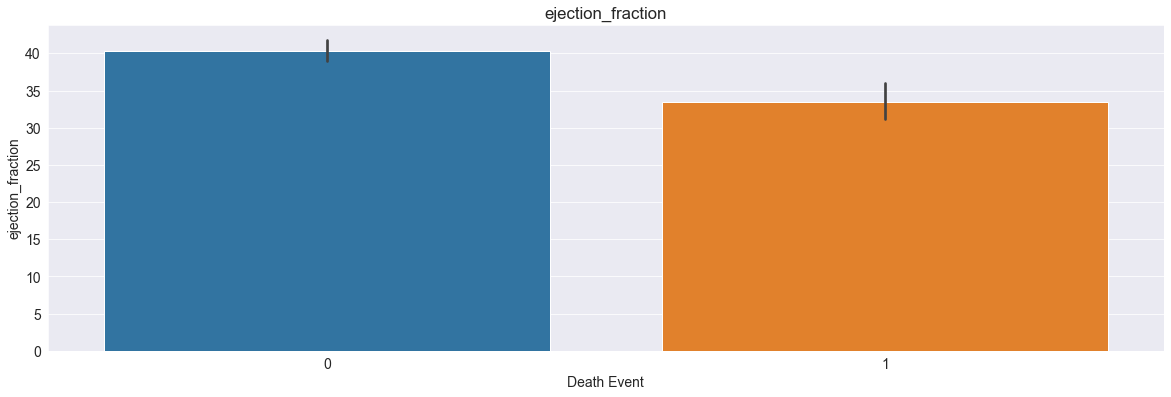

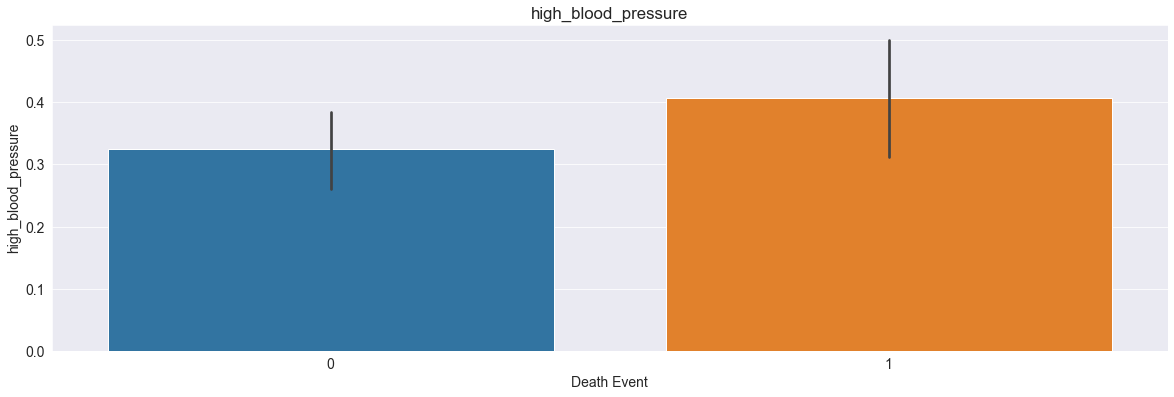

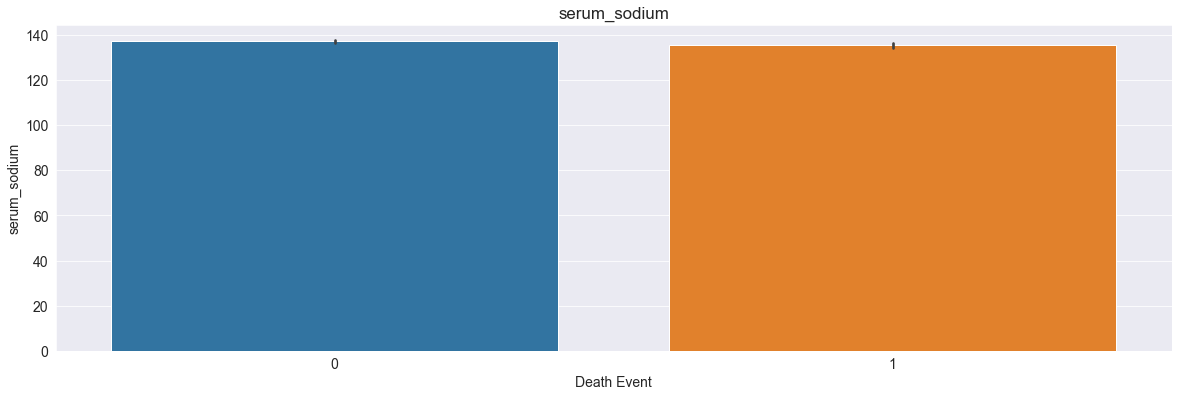

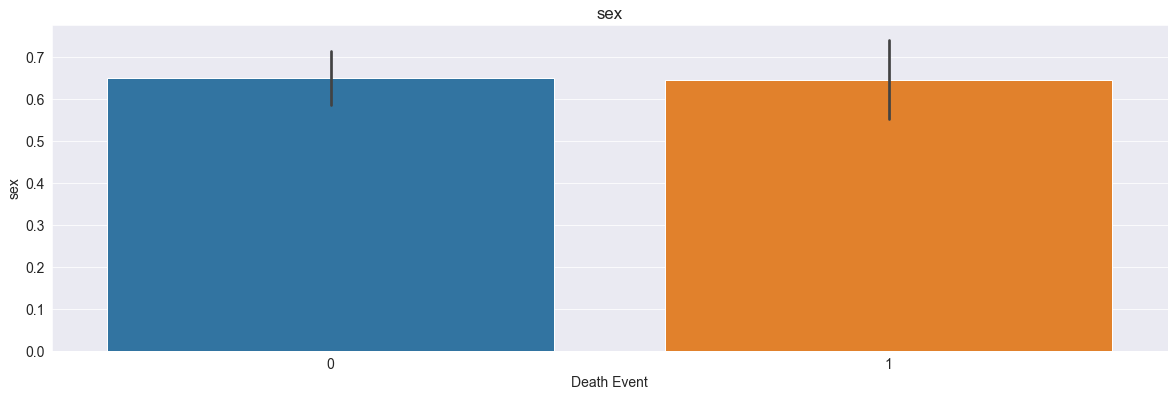

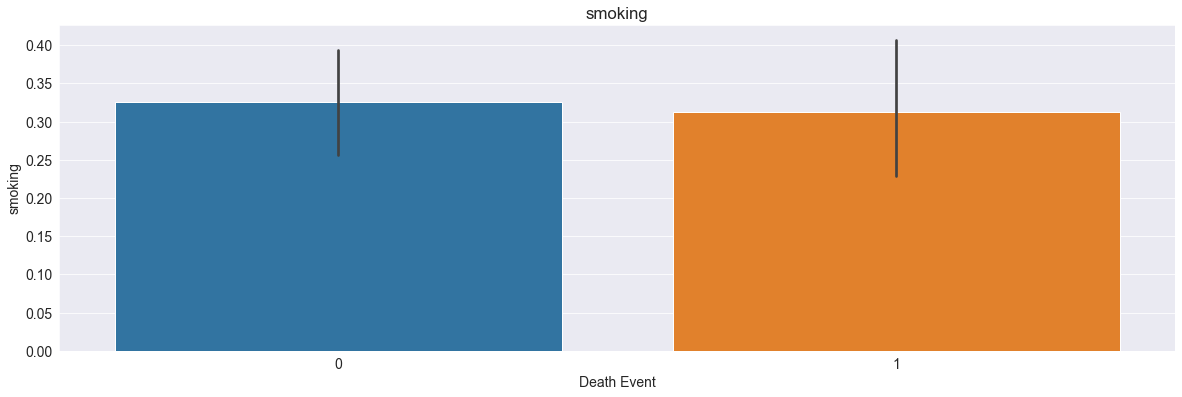

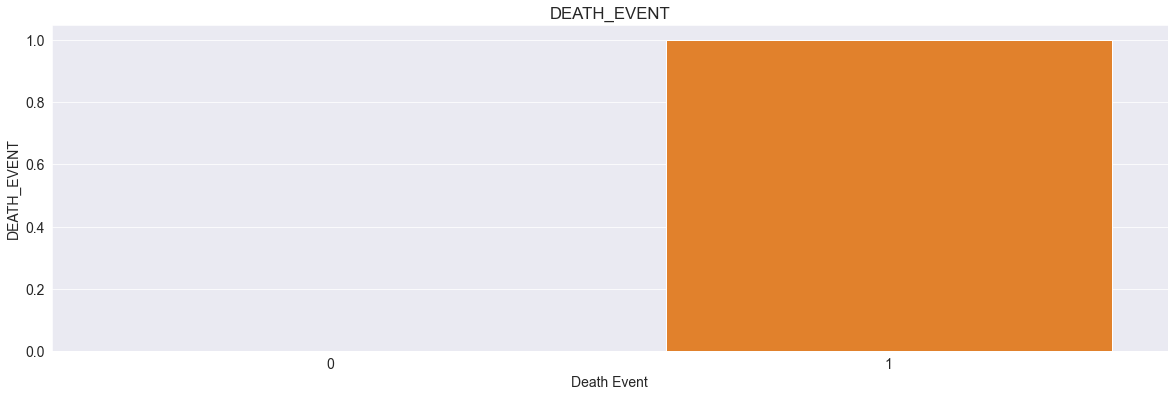

In [130]:
for feature in discrete_features:
    sns.barplot(y=feature, data=df, x='DEATH_EVENT')
    plt.title(feature)
    plt.xlabel('Death Event')
    plt.ylabel(feature)
    plt.show()

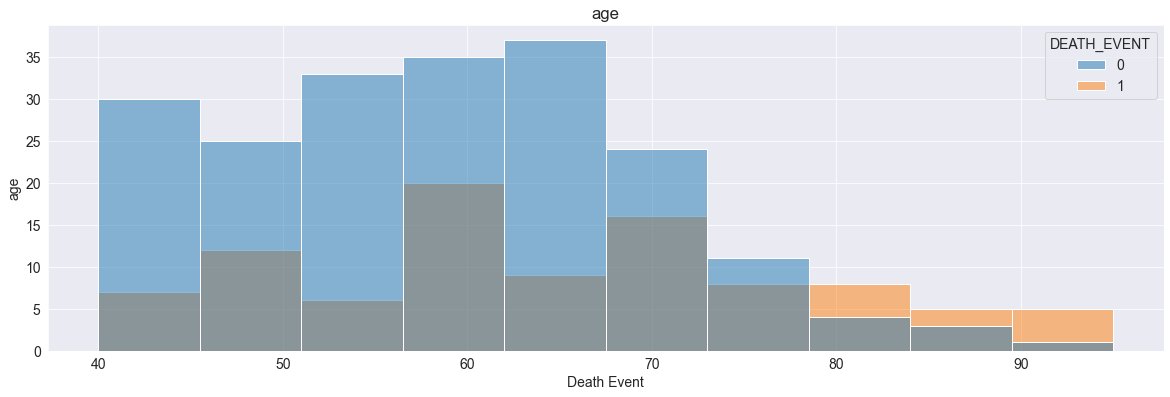

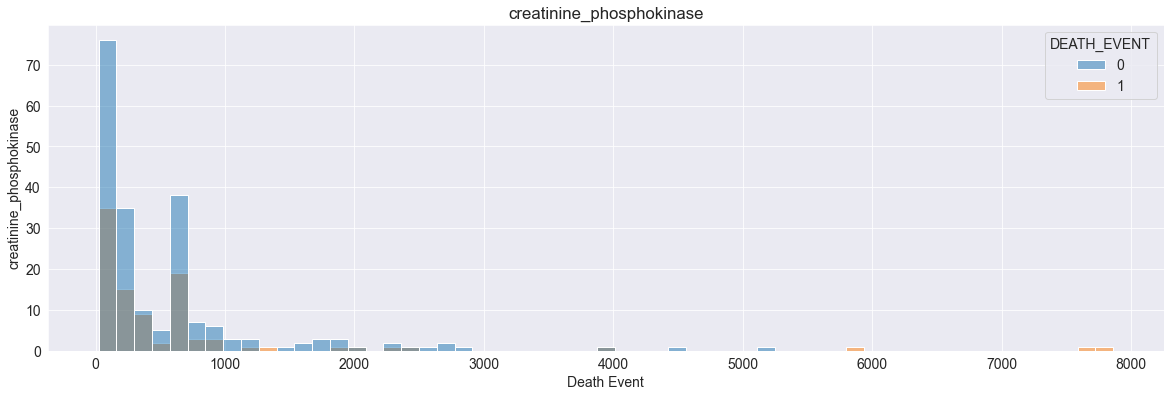

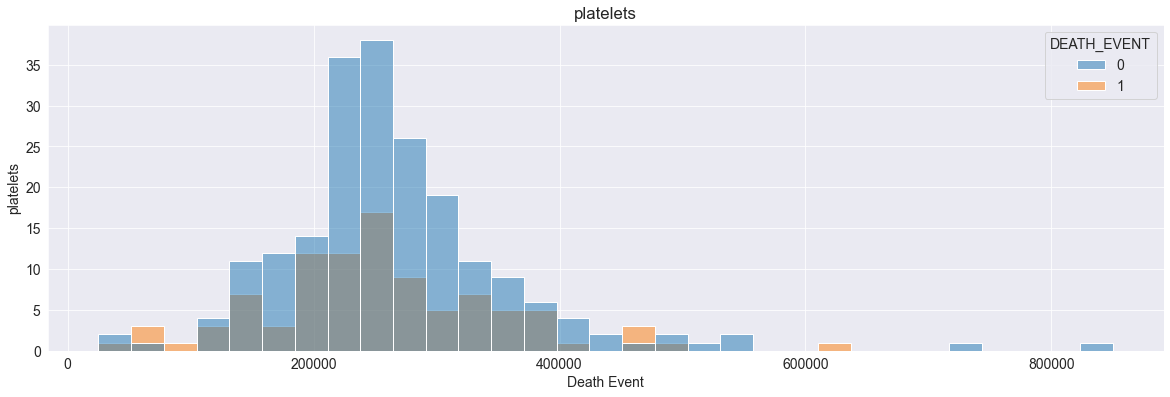

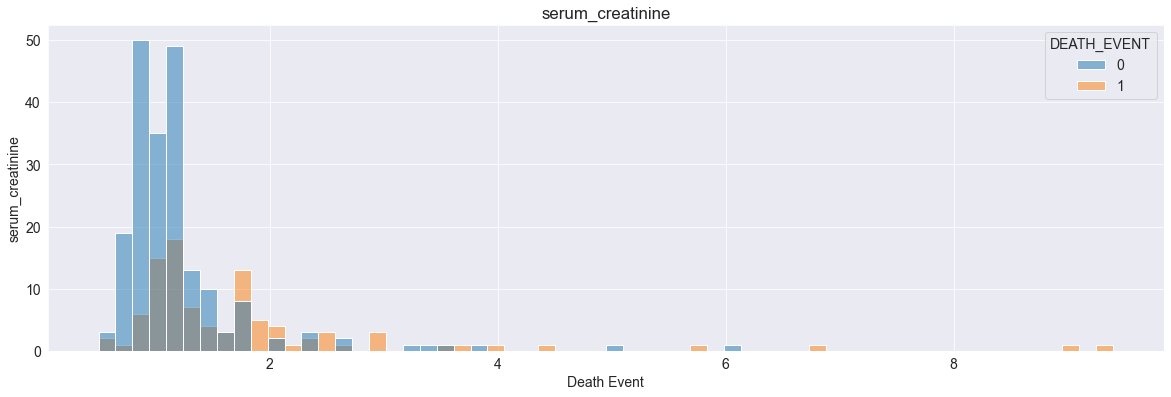

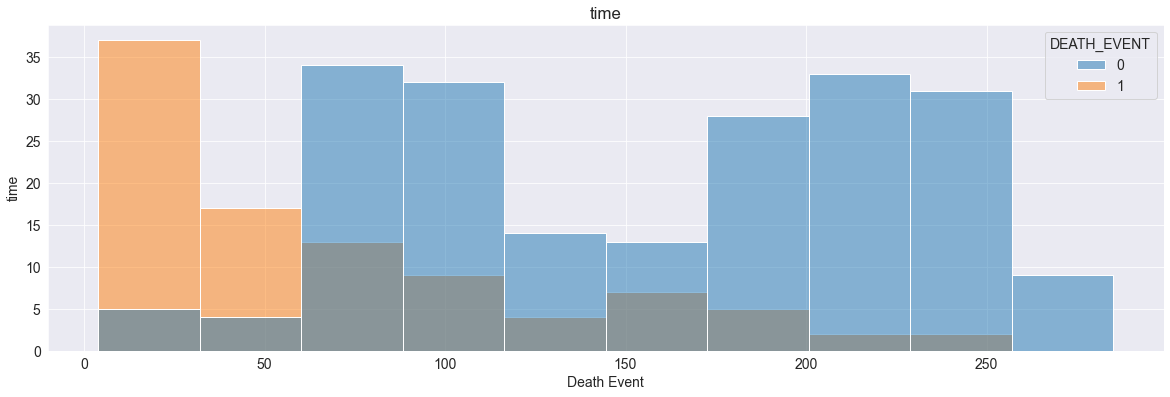

In [131]:
for feature in continuous_features:
    sns.histplot(x=feature, data=df, hue='DEATH_EVENT')
    plt.title(feature)
    plt.xlabel('Death Event')
    plt.ylabel(feature)
    plt.show()

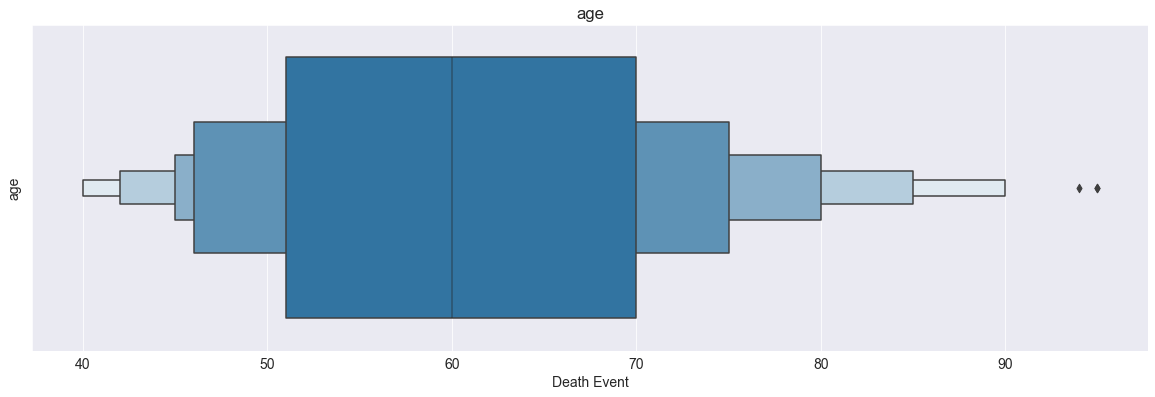

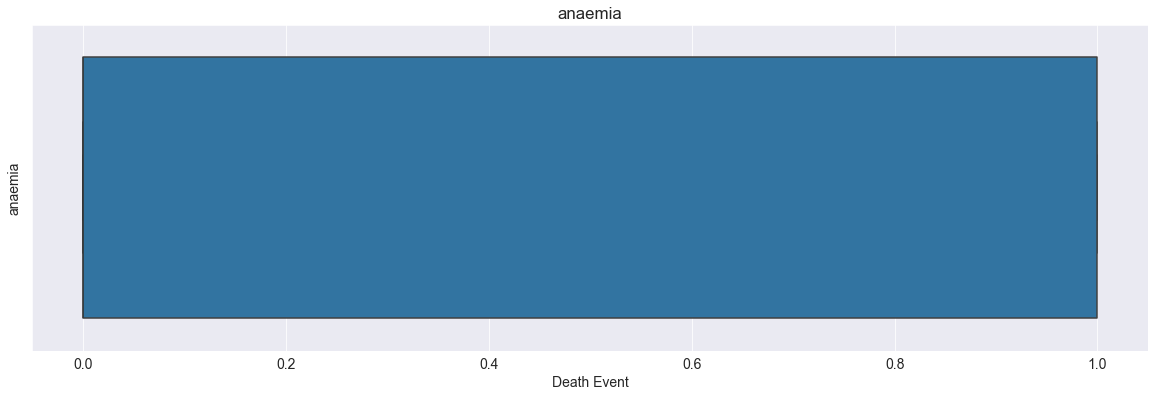

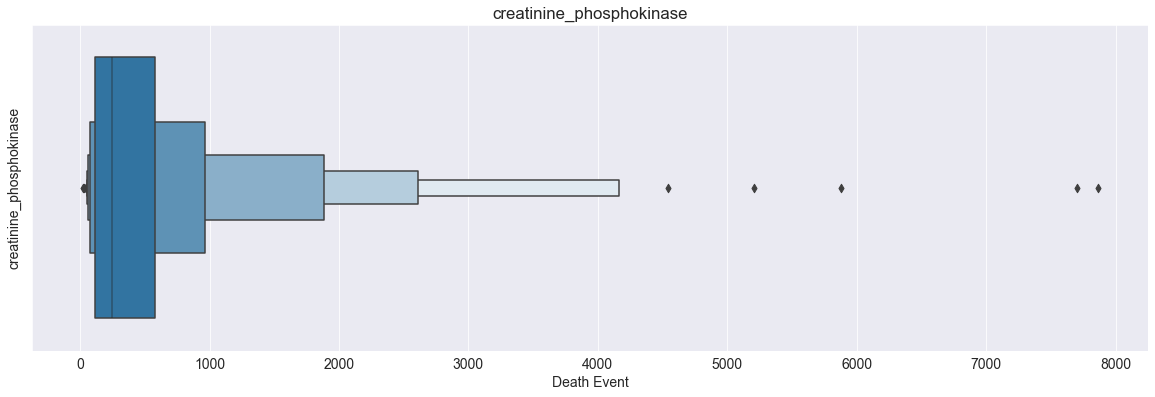

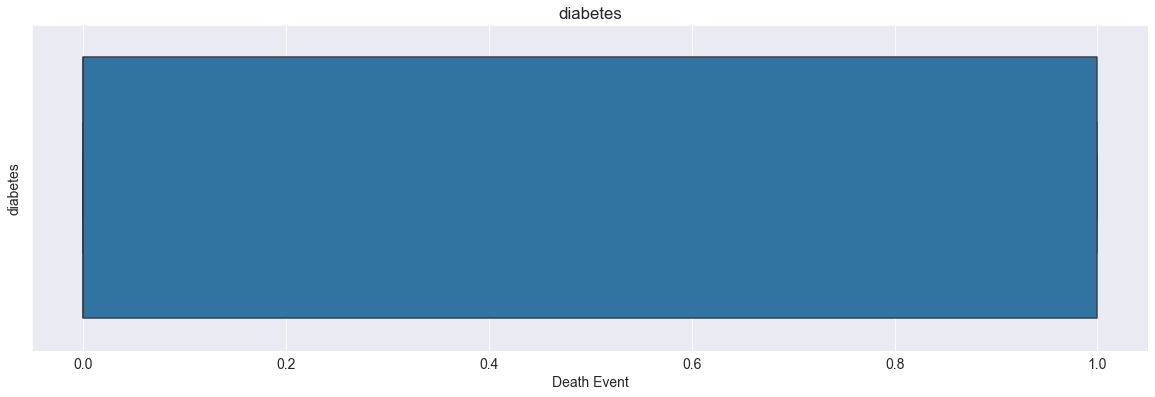

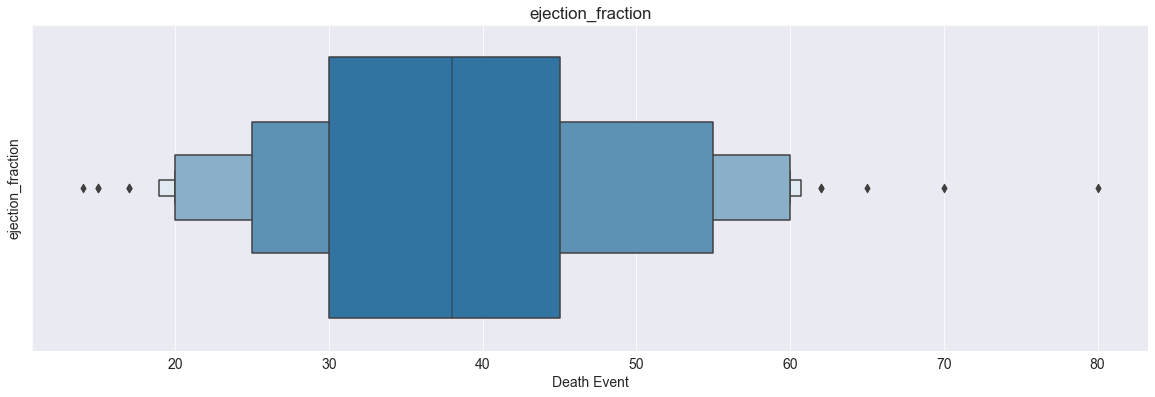

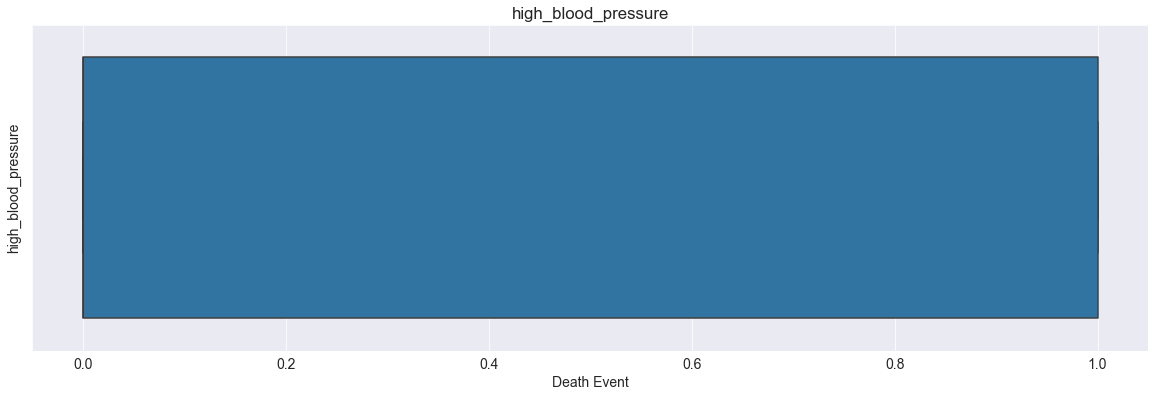

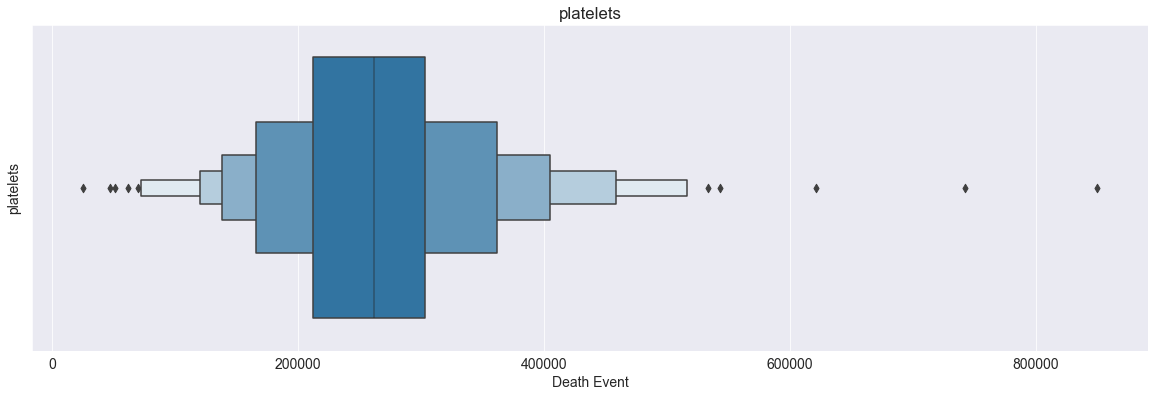

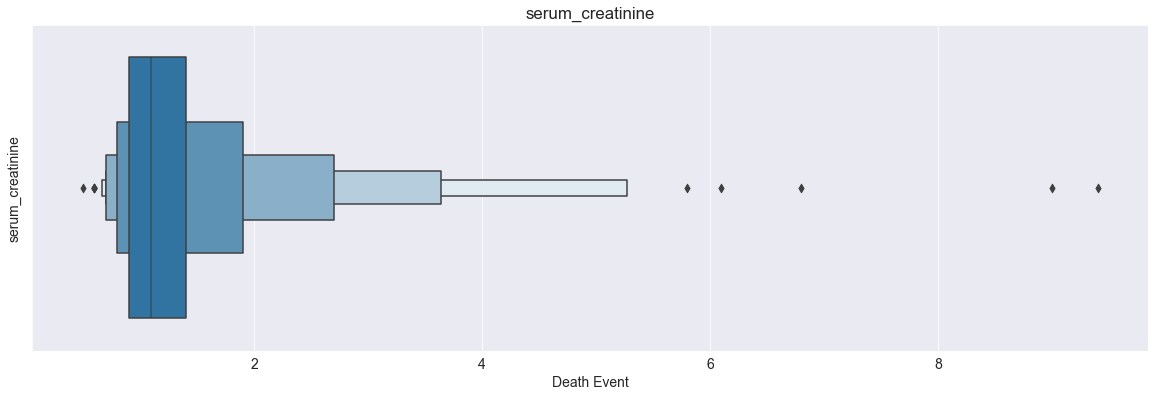

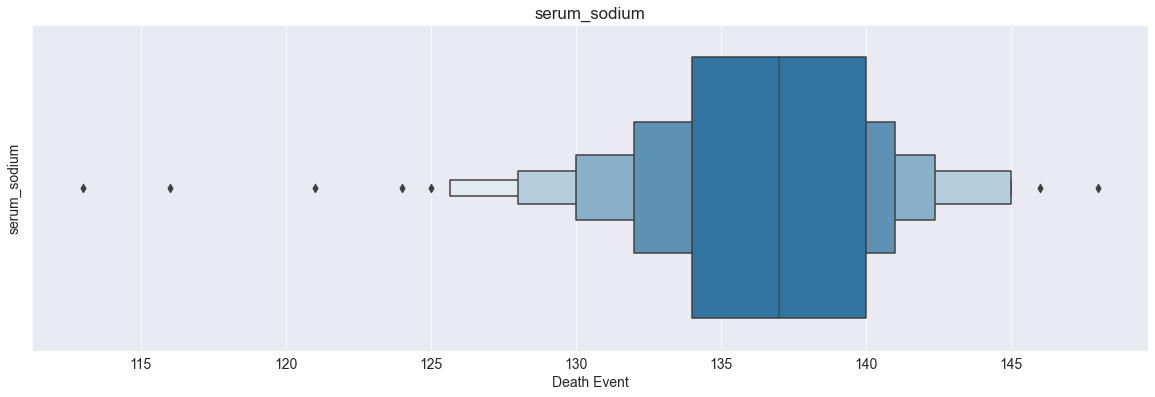

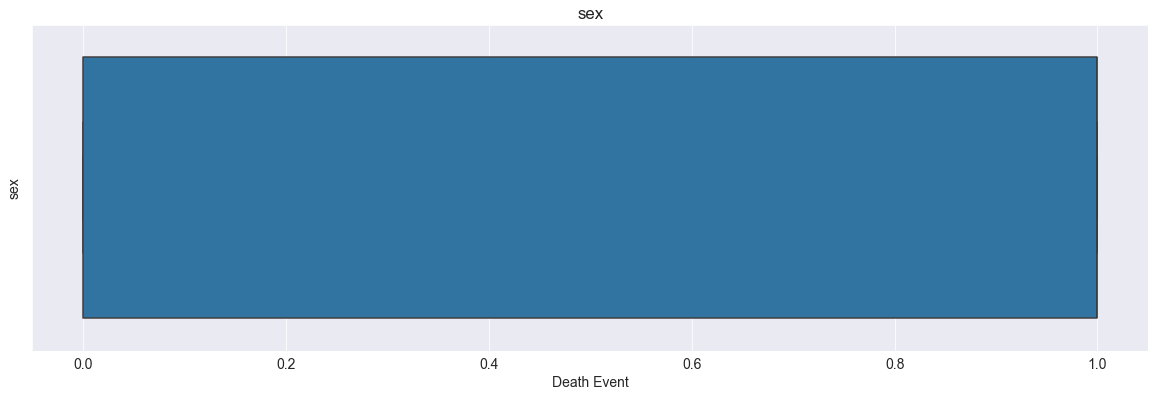

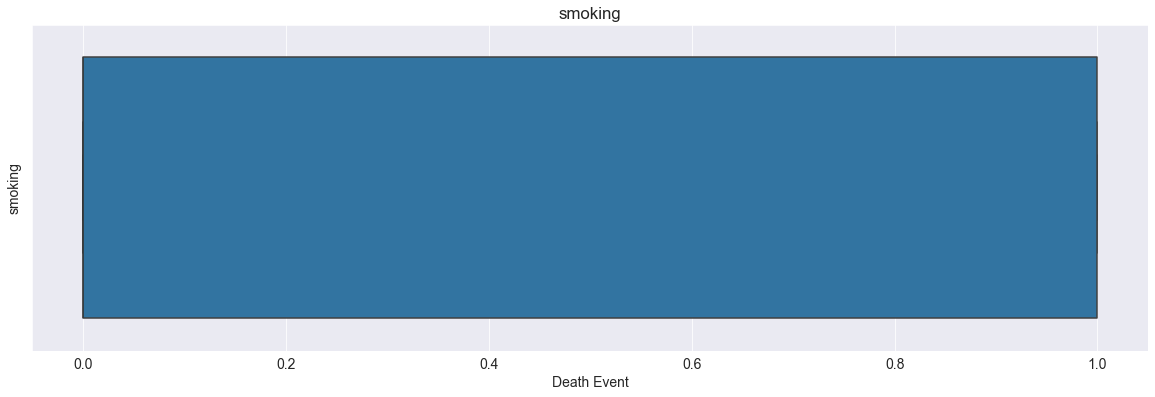

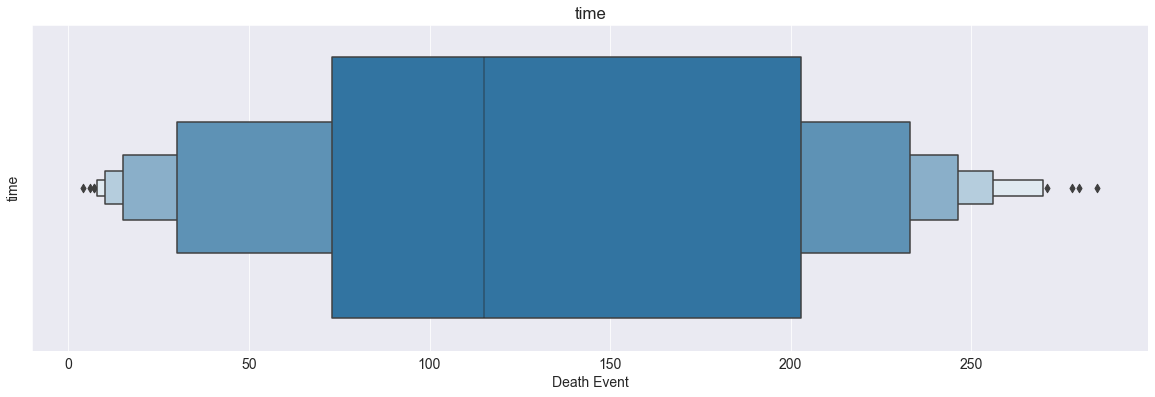

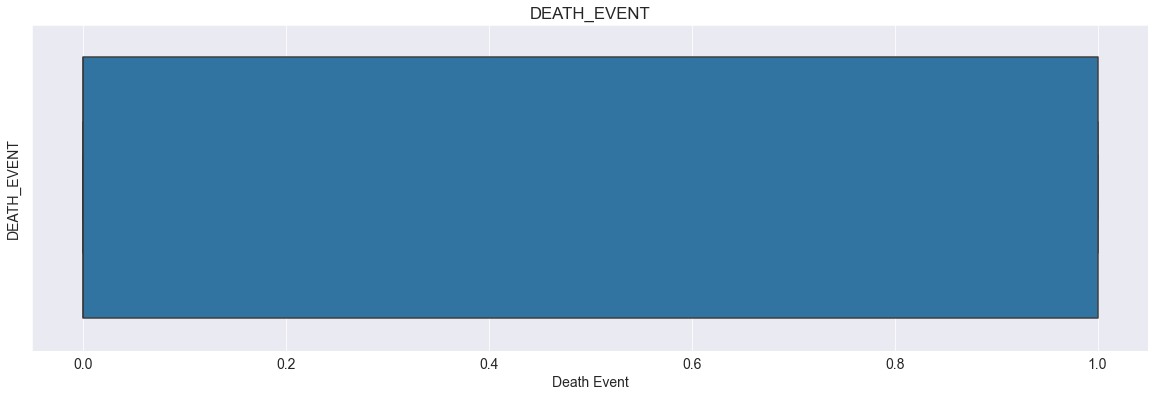

In [132]:
for feature in df.columns:
    sns.boxenplot(x=feature, data=df)
    plt.title(feature)
    plt.xlabel('Death Event')
    plt.ylabel(feature)
    plt.show()

There are a lot of outliers present in the dataset. 
But first, we need to balance the dataset.

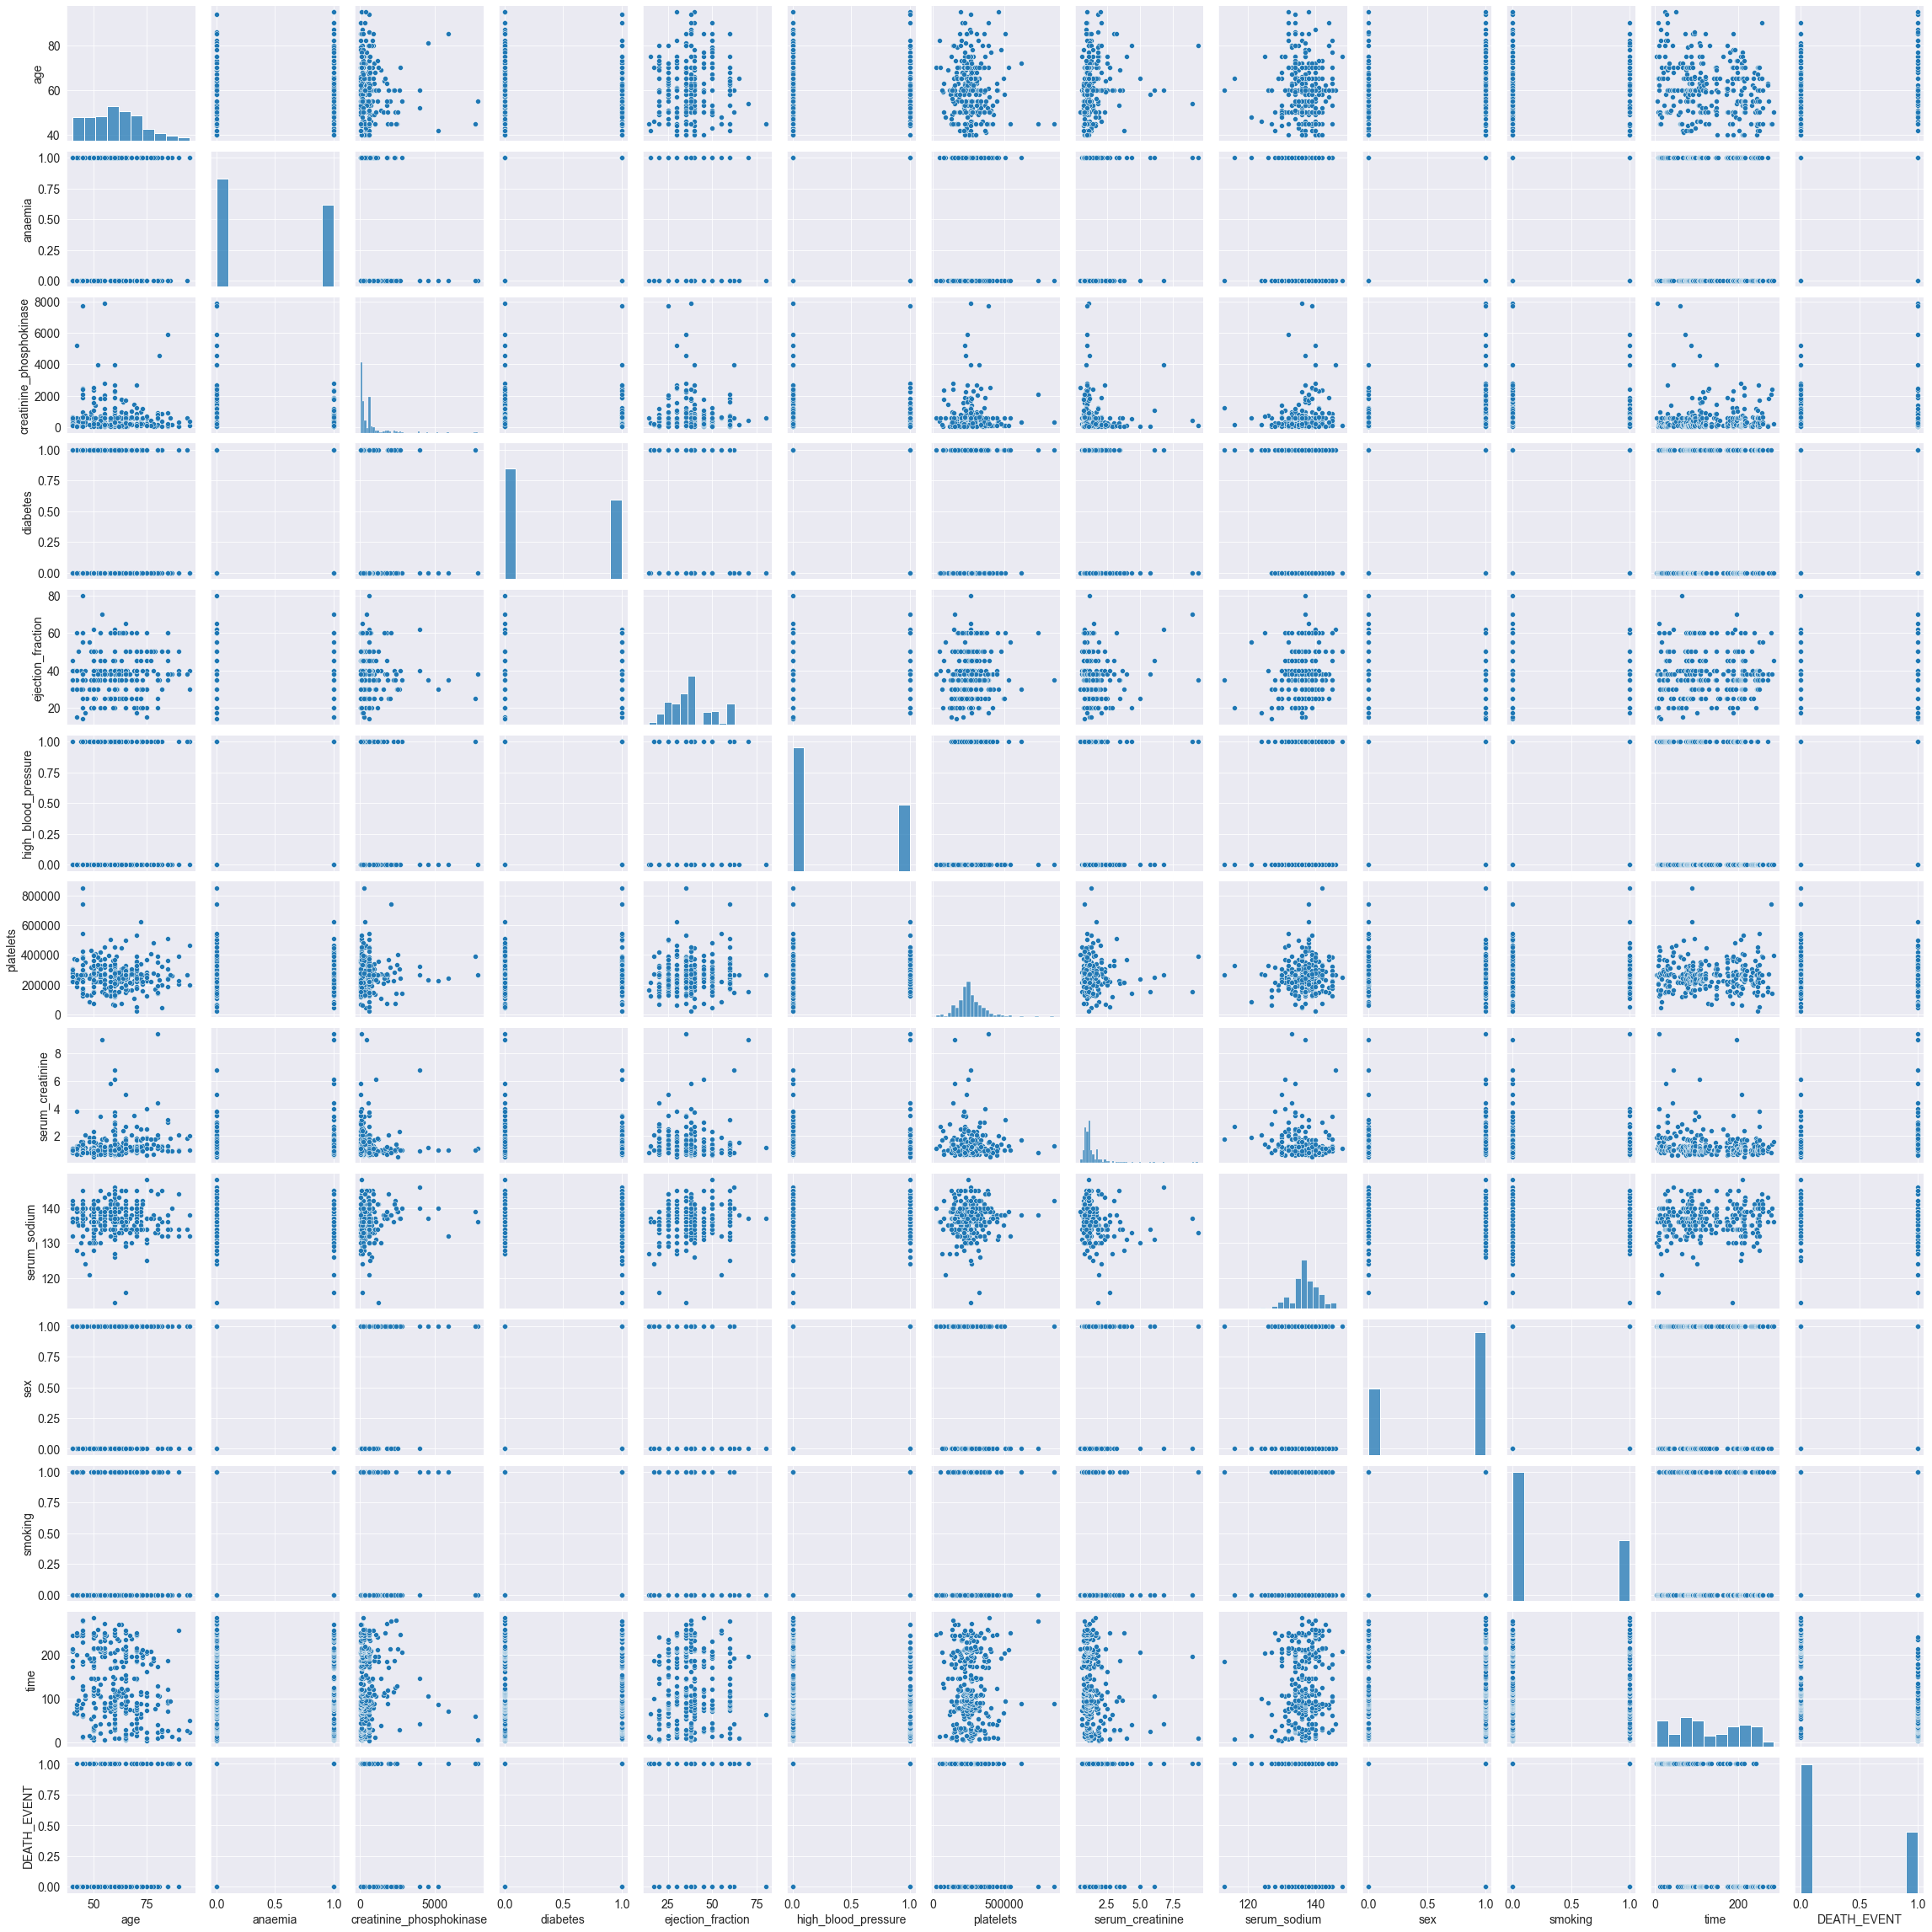

In [133]:
sns.pairplot(df)

In [134]:
corr = df.corr()

<AxesSubplot:>

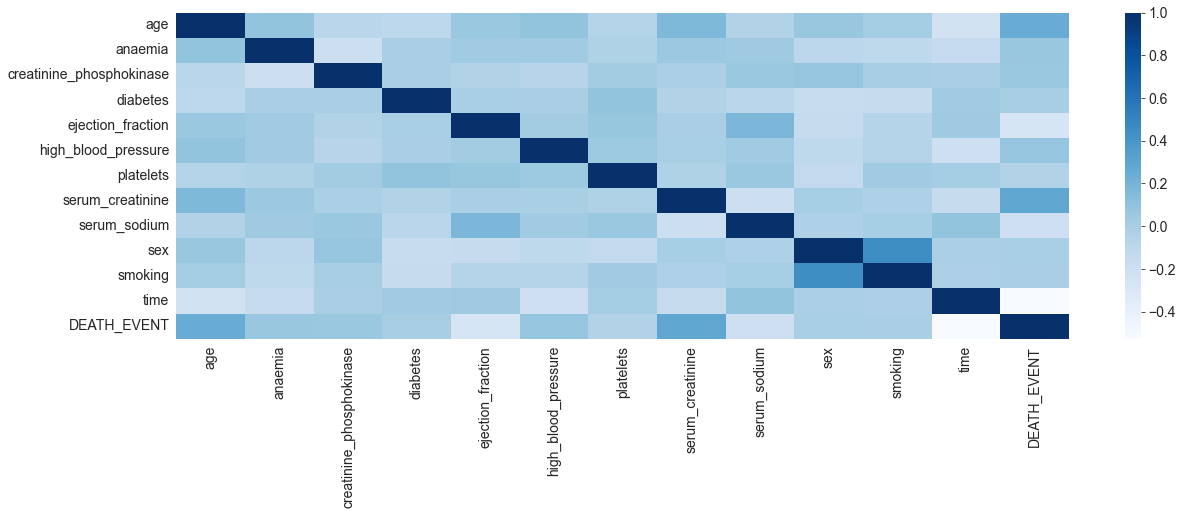

In [135]:
sns.heatmap(corr,  cbar=True, cmap='Blues')

## Balancing Dataset

In [136]:
X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 12) (200,)
(99, 12) (99,)


In [138]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [139]:
smk = SMOTETomek(random_state=42)

In [140]:
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

In [141]:
cols = X_train.columns

In [142]:
df1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
balanced_df = pd.concat([df1,df2], axis=0)

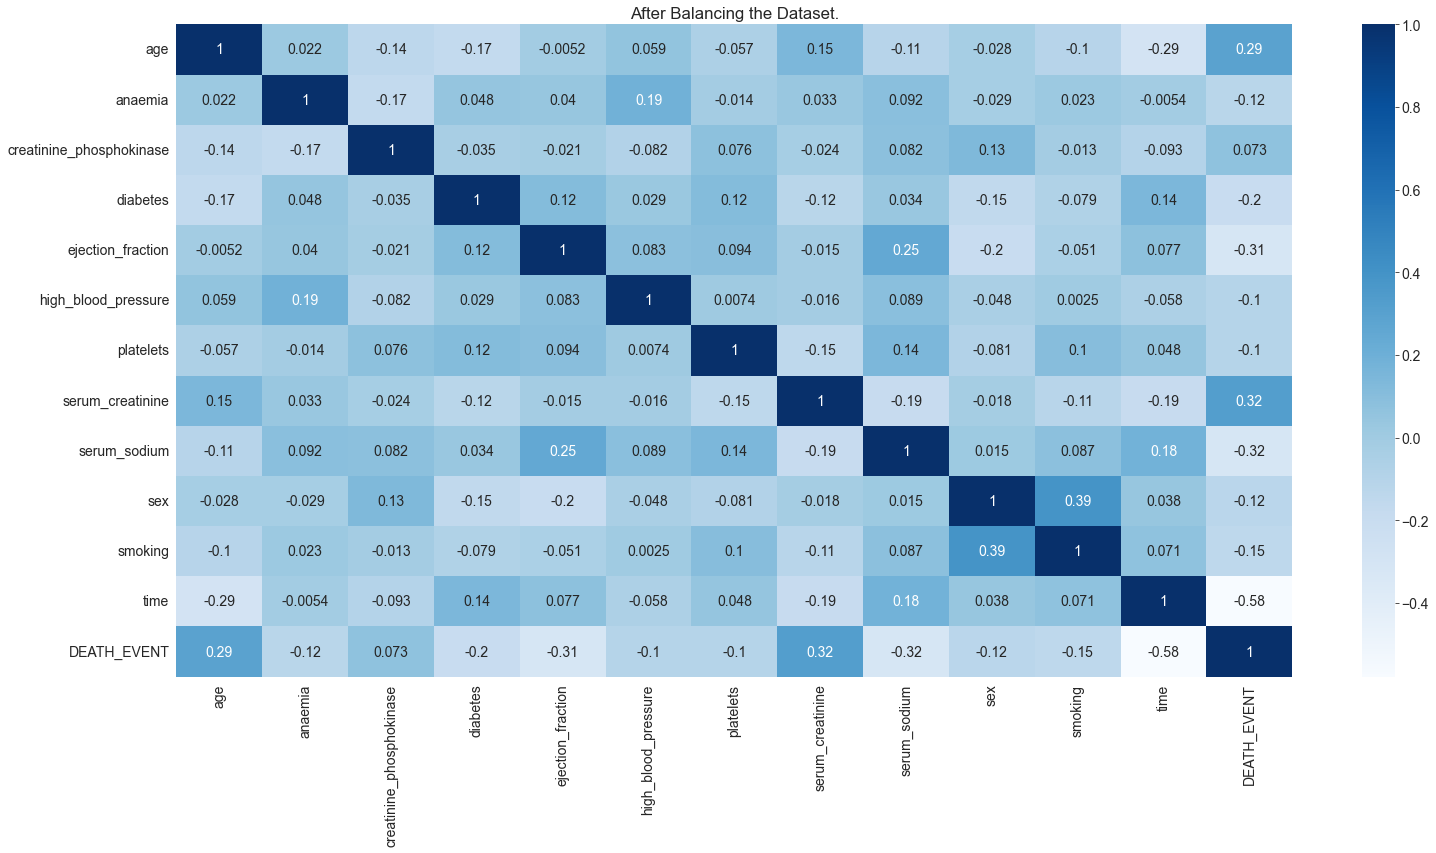

In [143]:
plt.figure(figsize=(25,12))
sns.heatmap(balanced_df.corr(), cbar=True, annot = True, cmap= 'Blues')
plt.title('After Balancing the Dataset.')
plt.show()

In [144]:
balanced_df.DEATH_EVENT.value_counts()/len(df)*100

0    50.501672
1    50.501672
Name: DEATH_EVENT, dtype: float64

In [145]:
balanced_df.shape

(302, 13)

## Train Test Split

In [146]:
X= balanced_df.drop('DEATH_EVENT', axis=1)
y= balanced_df['DEATH_EVENT']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(202, 12) (202,)
(100, 12) (100,)


## Model Trainning

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
classifier = Sequential()

In [150]:
classifier.add(Dense(units=6, activation='relu', kernel_initializer='he_normal', input_dim = 12))
classifier.add(Dense(units=5, activation='relu', kernel_initializer='he_normal'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [151]:
classifier.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics= tf.keras.metrics.BinaryAccuracy())

In [152]:
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.30, epochs=50)

Epoch 1/50
15/15 [==============================] - 1s 26ms/step - loss: 0.8743 - binary_accuracy: 0.5248 - val_loss: 0.6469 - val_binary_accuracy: 0.6066
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 0.8251 - binary_accuracy: 0.5461 - val_loss: 0.6320 - val_binary_accuracy: 0.6066
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.7907 - binary_accuracy: 0.5603 - val_loss: 0.6197 - val_binary_accuracy: 0.6066
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.7574 - binary_accuracy: 0.5674 - val_loss: 0.6109 - val_binary_accuracy: 0.6230
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.7310 - binary_accuracy: 0.5816 - val_loss: 0.6042 - val_binary_accuracy: 0.6721
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 0.7094 - binary_accuracy: 0.6028 - val_loss: 0.6002 - val_binary_accuracy: 0.7049
Epoch 7/50
15/15 [==============================] - 0s 13ms/step - los

In [153]:
print(model_history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


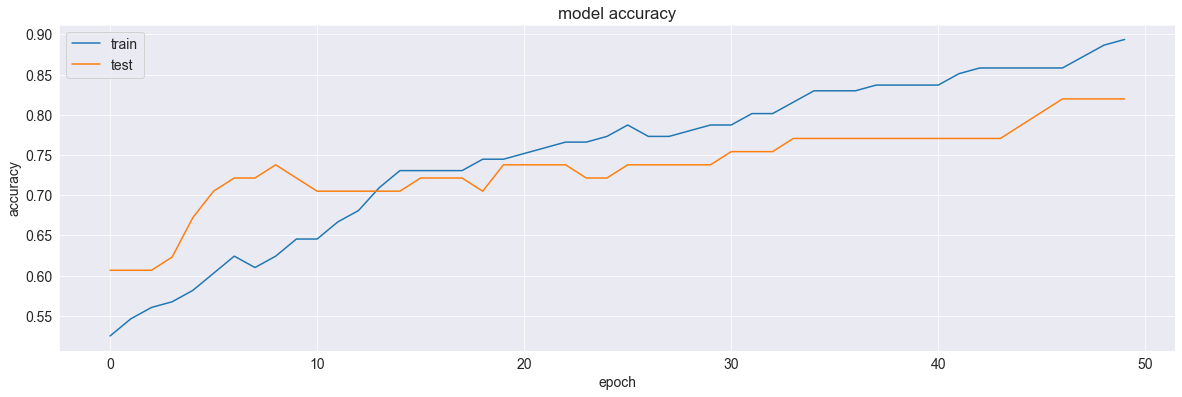

In [154]:
# summarize history for accuracy
plt.plot(model_history.history['binary_accuracy'])
plt.plot(model_history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

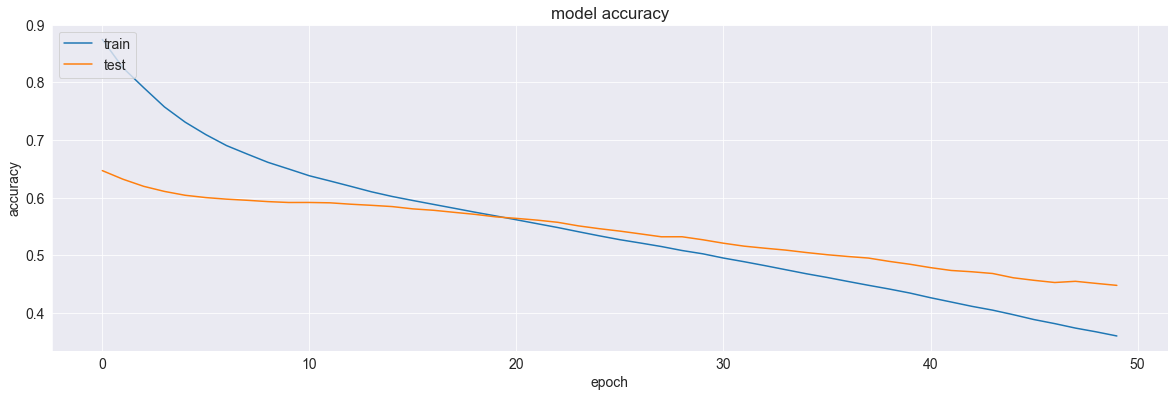

In [155]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [156]:
y_pred= classifier.predict(X_test)
y_pred = y_pred>0.5

4/4 [==============================] - 0s 3ms/step


In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [158]:
print(cm)
print(score)

[[47 15]
 [ 3 35]]
0.82


In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        62
           1       0.70      0.92      0.80        38

    accuracy                           0.82       100
   macro avg       0.82      0.84      0.82       100
weighted avg       0.85      0.82      0.82       100

